In [5]:
import pandas as pd

qc_data = {
    "Batch_ID": ["B001","B002","B003","B004","B005","B006","B007","B008","B009","B010"],
    "Assay_%": [98.5, 101.2, 99.1, 102.5, 97.8, 100.5, 96.9, 103.1, 99.7, 98.9],
    "Moisture_%": [1.2, 0.9, 1.5, 0.8, 1.9, 1.1, 2.2, 0.7, 1.0, 1.3],
    "Yield_%": [92, 95, 90, 97, 89, 94, 88, 98, 93, 91],
    "Pass_Fail": ["Pass","Pass","Pass","Fail","Pass","Pass","Fail","Fail","Pass","Pass"]
}

qc_df = pd.DataFrame(qc_data)
qc_df


,Batch_ID,Assay_%,Moisture_%,Yield_%,Pass_Fail
0,B001,98.5,1.2,92,Pass
1,B002,101.2,0.9,95,Pass
2,B003,99.1,1.5,90,Pass
3,B004,102.5,0.8,97,Fail
4,B005,97.8,1.9,89,Pass
5,B006,100.5,1.1,94,Pass
6,B007,96.9,2.2,88,Fail
7,B008,103.1,0.7,98,Fail
8,B009,99.7,1.0,93,Pass
9,B010,98.9,1.3,91,Pass


In [6]:
# Quick overview of the QC dataset
qc_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Batch_ID    10 non-null     object 
 1   Assay_%     10 non-null     float64
 2   Moisture_%  10 non-null     float64
 3   Yield_%     10 non-null     int64  
 4   Pass_Fail   10 non-null     object 
dtypes: float64(2), int64(1), object(2)
memory usage: 532.0+ bytes


In [7]:
# Summary statistics for numeric columns
qc_df.describe()


,Assay_%,Moisture_%,Yield_%
count,10.000,10.000000,10.000
mean,99.820,1.260000,92.700
std,2.001,0.483506,3.335
min,96.900,0.700000,88.000
25%,98.600,0.925000,90.250
50%,99.400,1.150000,92.500
75%,101.025,1.450000,94.750
max,103.100,2.200000,98.000


In [8]:
# Average values by Pass/Fail
qc_df.groupby("Pass_Fail")[["Assay_%", "Moisture_%", "Yield_%"]].mean()


,Assay_%,Moisture_%,Yield_%
Pass_Fail,,,
Fail,100.833333,1.233333,94.333333
Pass,99.385714,1.271429,92.000000


In [9]:
import matplotlib.pyplot as plt



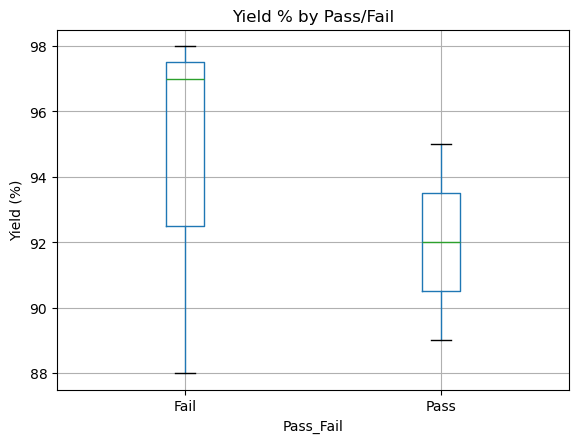

In [10]:
# Simple boxplot of Yield by Pass/Fail
qc_df.boxplot(column="Yield_%", by="Pass_Fail")
plt.title("Yield % by Pass/Fail")
plt.suptitle("")  # remove extra automatic title
plt.xlabel("Pass_Fail")
plt.ylabel("Yield (%)")
plt.show()


### Week 3 – QC Data Exploration (Day 1)

- I created a small GMP-style QC dataset with Batch ID, Assay %, Moisture %, Yield %, and Pass/Fail status.
- I reviewed summary statistics to understand typical assay, moisture, and yield ranges.
- I compared Pass vs Fail batches and observed how quality metrics differ between them.
- I plotted Yield % by Pass/Fail to visually inspect whether failing batches tend to have lower yields or more variability.


In [11]:
qc_df["Pass_Fail"].value_counts()


Pass_Fail
Pass    7
Fail    3
Name: count, dtype: int64

In [12]:
qc_df["Pass_Fail"].value_counts(normalize=True) * 100


Pass_Fail
Pass    70.0
Fail    30.0
Name: proportion, dtype: float64

In [13]:
qc_df.groupby("Pass_Fail")[["Assay_%", "Moisture_%", "Yield_%"]].mean()


,Assay_%,Moisture_%,Yield_%
Pass_Fail,,,
Fail,100.833333,1.233333,94.333333
Pass,99.385714,1.271429,92.000000


In [14]:
# Define QC specification limits
ASSAY_LOW = 98.0
ASSAY_HIGH = 102.0
MOISTURE_MAX = 1.5
YIELD_MIN = 90


In [15]:
def qc_decision(row):
    issues = []

    # Check assay
    if row["Assay_%"] < ASSAY_LOW or row["Assay_%"] > ASSAY_HIGH:
        issues.append("Assay OOS")
    
    # Check moisture
    if row["Moisture_%"] > MOISTURE_MAX:
        issues.append("High Moisture")
    
    # Check yield
    if row["Yield_%"] < YIELD_MIN:
        issues.append("Low Yield")

    if len(issues) == 0:
        return "Within Spec"
    else:
        return ", ".join(issues)

qc_df["QC_Evaluation"] = qc_df.apply(qc_decision, axis=1)
qc_df


,Batch_ID,Assay_%,Moisture_%,Yield_%,Pass_Fail,QC_Evaluation
0,B001,98.5,1.2,92,Pass,Within Spec
1,B002,101.2,0.9,95,Pass,Within Spec
2,B003,99.1,1.5,90,Pass,Within Spec
3,B004,102.5,0.8,97,Fail,Assay OOS
4,B005,97.8,1.9,89,Pass,"Assay OOS, High Moisture, Low Yield"
5,B006,100.5,1.1,94,Pass,Within Spec
6,B007,96.9,2.2,88,Fail,"Assay OOS, High Moisture, Low Yield"
7,B008,103.1,0.7,98,Fail,Assay OOS
8,B009,99.7,1.0,93,Pass,Within Spec
9,B010,98.9,1.3,91,Pass,Within Spec


In [16]:
qc_df["QC_Evaluation"].value_counts()


QC_Evaluation
Within Spec                            6
Assay OOS                              2
Assay OOS, High Moisture, Low Yield    2
Name: count, dtype: int64

In [17]:
qc_df[["Batch_ID","Assay_%","Moisture_%","Yield_%","QC_Evaluation"]]


,Batch_ID,Assay_%,Moisture_%,Yield_%,QC_Evaluation
0,B001,98.5,1.2,92,Within Spec
1,B002,101.2,0.9,95,Within Spec
2,B003,99.1,1.5,90,Within Spec
3,B004,102.5,0.8,97,Assay OOS
4,B005,97.8,1.9,89,"Assay OOS, High Moisture, Low Yield"
5,B006,100.5,1.1,94,Within Spec
6,B007,96.9,2.2,88,"Assay OOS, High Moisture, Low Yield"
7,B008,103.1,0.7,98,Assay OOS
8,B009,99.7,1.0,93,Within Spec
9,B010,98.9,1.3,91,Within Spec


In [18]:
qc_df[qc_df["QC_Evaluation"].str.contains("High Moisture", na=False)]


,Batch_ID,Assay_%,Moisture_%,Yield_%,Pass_Fail,QC_Evaluation
4,B005,97.8,1.9,89,Pass,"Assay OOS, High Moisture, Low Yield"
6,B007,96.9,2.2,88,Fail,"Assay OOS, High Moisture, Low Yield"


In [19]:
assay_issues = qc_df[qc_df["QC_Evaluation"].str.contains("Assay OOS", na=False)]
assay_issues[["Batch_ID", "Assay_%", "Moisture_%", "Yield_%", "QC_Evaluation"]]


,Batch_ID,Assay_%,Moisture_%,Yield_%,QC_Evaluation
3,B004,102.5,0.8,97,Assay OOS
4,B005,97.8,1.9,89,"Assay OOS, High Moisture, Low Yield"
6,B007,96.9,2.2,88,"Assay OOS, High Moisture, Low Yield"
7,B008,103.1,0.7,98,Assay OOS


In [20]:
assay_issues["Assay_%"].describe()


count      4.000000
mean     100.075000
std        3.177394
min       96.900000
25%       97.575000
50%      100.150000
75%      102.650000
max      103.100000
Name: Assay_%, dtype: float64

In [21]:
yield_issues = qc_df[qc_df["QC_Evaluation"].str.contains("Low Yield", na=False)]
yield_issues[["Batch_ID", "Assay_%", "Moisture_%", "Yield_%", "QC_Evaluation"]]


,Batch_ID,Assay_%,Moisture_%,Yield_%,QC_Evaluation
4,B005,97.8,1.9,89,"Assay OOS, High Moisture, Low Yield"
6,B007,96.9,2.2,88,"Assay OOS, High Moisture, Low Yield"


In [22]:
qc_df.groupby("QC_Evaluation")[["Yield_%"]].mean()


,Yield_%
QC_Evaluation,
Assay OOS,97.5
"Assay OOS, High Moisture, Low Yield",88.5
Within Spec,92.5


In [23]:
qc_df.groupby("Pass_Fail")[["Yield_%"]].mean()


,Yield_%
Pass_Fail,
Fail,94.333333
Pass,92.000000


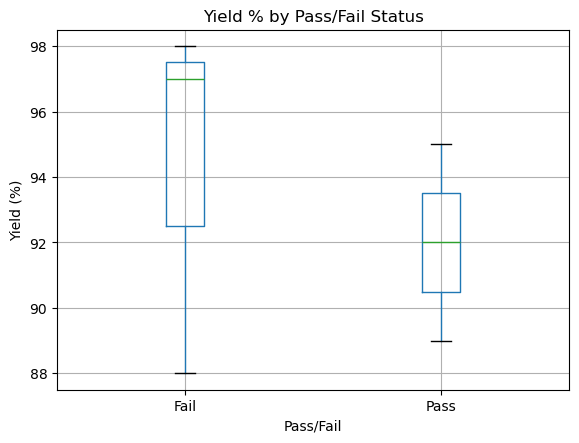

In [24]:
import matplotlib.pyplot as plt

qc_df.boxplot(column="Yield_%", by="Pass_Fail")
plt.title("Yield % by Pass/Fail Status")
plt.suptitle("")
plt.xlabel("Pass/Fail")
plt.ylabel("Yield (%)")
plt.show()


### Week 3 – QC Spec-Based Analysis

- I defined specification limits for Assay (98–102%), Moisture (≤ 1.5%), and Yield (≥ 90%).
- Using these limits, I built a rule-based QC_Evaluation system to automatically flag Assay OOS, High Moisture, and Low Yield batches.
- I then focused on:
  - **Assay OOS**: Identified batches with potency outside 98–102%, indicating potential formulation, mixing, or analytical issues.
  - **Low Yield**: Identified batches with yield below 90%, suggesting process inefficiency and potential link to batch failures.
- This mirrors how GMP manufacturing and CMC teams monitor batch quality and investigate deviations.


In [25]:
def risk_level(evaluation):
    if "Assay OOS" in evaluation or "High Moisture" in evaluation:
        return "High Risk"
    elif "Low Yield" in evaluation:
        return "Moderate Risk"
    else:
        return "Low Risk"

qc_df["Risk_Level"] = qc_df["QC_Evaluation"].apply(risk_level)
qc_df


,Batch_ID,Assay_%,Moisture_%,Yield_%,Pass_Fail,QC_Evaluation,Risk_Level
0,B001,98.5,1.2,92,Pass,Within Spec,Low Risk
1,B002,101.2,0.9,95,Pass,Within Spec,Low Risk
2,B003,99.1,1.5,90,Pass,Within Spec,Low Risk
3,B004,102.5,0.8,97,Fail,Assay OOS,High Risk
4,B005,97.8,1.9,89,Pass,"Assay OOS, High Moisture, Low Yield",High Risk
5,B006,100.5,1.1,94,Pass,Within Spec,Low Risk
6,B007,96.9,2.2,88,Fail,"Assay OOS, High Moisture, Low Yield",High Risk
7,B008,103.1,0.7,98,Fail,Assay OOS,High Risk
8,B009,99.7,1.0,93,Pass,Within Spec,Low Risk
9,B010,98.9,1.3,91,Pass,Within Spec,Low Risk


In [26]:
qc_df["Risk_Level"].value_counts()


Risk_Level
Low Risk     6
High Risk    4
Name: count, dtype: int64

In [27]:
high_risk = qc_df[qc_df["Risk_Level"] == "High Risk"]
high_risk


,Batch_ID,Assay_%,Moisture_%,Yield_%,Pass_Fail,QC_Evaluation,Risk_Level
3,B004,102.5,0.8,97,Fail,Assay OOS,High Risk
4,B005,97.8,1.9,89,Pass,"Assay OOS, High Moisture, Low Yield",High Risk
6,B007,96.9,2.2,88,Fail,"Assay OOS, High Moisture, Low Yield",High Risk
7,B008,103.1,0.7,98,Fail,Assay OOS,High Risk


In [28]:
high_risk["QC_Evaluation"].value_counts()


QC_Evaluation
Assay OOS                              2
Assay OOS, High Moisture, Low Yield    2
Name: count, dtype: int64

In [29]:
investigation_table = high_risk[[
    "Batch_ID",
    "Assay_%",
    "Moisture_%",
    "Yield_%",
    "QC_Evaluation",
    "Risk_Level"
]]

investigation_table


,Batch_ID,Assay_%,Moisture_%,Yield_%,QC_Evaluation,Risk_Level
3,B004,102.5,0.8,97,Assay OOS,High Risk
4,B005,97.8,1.9,89,"Assay OOS, High Moisture, Low Yield",High Risk
6,B007,96.9,2.2,88,"Assay OOS, High Moisture, Low Yield",High Risk
7,B008,103.1,0.7,98,Assay OOS,High Risk


In [30]:
investigation_table["Issue_Count"] = investigation_table["QC_Evaluation"].apply(lambda x: len(x.split(",")))
investigation_table


,Batch_ID,Assay_%,Moisture_%,Yield_%,QC_Evaluation,Risk_Level,Issue_Count
3,B004,102.5,0.8,97,Assay OOS,High Risk,1
4,B005,97.8,1.9,89,"Assay OOS, High Moisture, Low Yield",High Risk,3
6,B007,96.9,2.2,88,"Assay OOS, High Moisture, Low Yield",High Risk,3
7,B008,103.1,0.7,98,Assay OOS,High Risk,1


In [31]:
investigation_table.sort_values(by="Issue_Count", ascending=False)


,Batch_ID,Assay_%,Moisture_%,Yield_%,QC_Evaluation,Risk_Level,Issue_Count
4,B005,97.8,1.9,89,"Assay OOS, High Moisture, Low Yield",High Risk,3
6,B007,96.9,2.2,88,"Assay OOS, High Moisture, Low Yield",High Risk,3
3,B004,102.5,0.8,97,Assay OOS,High Risk,1
7,B008,103.1,0.7,98,Assay OOS,High Risk,1


In [32]:
investigation_table.to_csv("Week3_QA_Investigation_Report.csv", index=False)
print("Report saved successfully.")


Report saved successfully.


## Final Quality Review Summary – Week 3 QC Analytics

This analysis evaluated pharmaceutical batch performance using Assay %, Moisture %, and Yield % with defined specification limits. A rule-based QC evaluation system was implemented to automatically identify Out-of-Spec and at-risk batches. Risk was classified into Low, Moderate, and High to support GMP-style decision making.

### Key Findings
- Majority of batches were Low Risk, but **40% were High Risk**, which is significant for pharma quality standards.
- High Risk batches were mainly associated with **Assay OOS**, and 50% of these batches also experienced **High Moisture and Low Yield simultaneously**, indicating possible systemic manufacturing weaknesses.
- Single-issue High Risk batches (Assay OOS only) may represent localized deviations or analytical variability.

### Investigation Prioritization
Priority focus should be placed on batches with **multiple concurrent failures**, as they suggest instability in drying, potency consistency, and process efficiency.

### GMP Interpretation
Although several batches performed within acceptable limits, the frequency and severity of High Risk batches indicate that the manufacturing process is **not fully under control**. These results would normally trigger deviation investigations, root cause analysis, and corrective action to protect patient safety and ensure compliance.

### Tools & Skills Demonstrated
- Python (Pandas, Matplotlib)
- Pharmaceutical QC analytics
- Risk-based decision thinking
- GMP / CMC reasoning
- Automated rule-based evaluation


## Week 4 — Predictive Thinking Setup

In Week 4, we begin transitioning from reactive QC analytics to predictive intelligence. 
Instead of only identifying High Risk batches after they fail, we are preparing the dataset 
to eventually predict which batches are likely to fail in advance.

In this section, we create a new outcome label:
- "Pass" for Low Risk batches
- "Fail" for High Risk batches

This prepares the dataset for future prediction modeling.


In [33]:
qc_df["Outcome"] = qc_df["Risk_Level"].apply(
    lambda x: "Fail" if x == "High Risk" else "Pass"
)

qc_df[["Batch_ID","Risk_Level","Outcome"]]


,Batch_ID,Risk_Level,Outcome
0,B001,Low Risk,Pass
1,B002,Low Risk,Pass
2,B003,Low Risk,Pass
3,B004,High Risk,Fail
4,B005,High Risk,Fail
5,B006,Low Risk,Pass
6,B007,High Risk,Fail
7,B008,High Risk,Fail
8,B009,Low Risk,Pass
9,B010,Low Risk,Pass


In [34]:
qc_df.groupby("Outcome")[["Assay_%","Moisture_%","Yield_%"]].mean()


,Assay_%,Moisture_%,Yield_%
Outcome,,,
Fail,100.075,1.400000,93.0
Pass,99.650,1.166667,92.5


In [35]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report


In [36]:
X = qc_df[["Assay_%","Moisture_%","Yield_%"]]   # inputs
y = qc_df["Outcome"]                             # Pass / Fail


In [37]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=1
)


In [38]:
model = DecisionTreeClassifier(random_state=1)
model.fit(X_train, y_train)


DecisionTreeClassifier(random_state=1)

In [39]:
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

        Fail       1.00      1.00      1.00         1
        Pass       1.00      1.00      1.00         2

    accuracy                           1.00         3
   macro avg       1.00      1.00      1.00         3
weighted avg       1.00      1.00      1.00         3



In [40]:
import pandas as pd

importance = pd.DataFrame({
    "Feature": ["Assay_%", "Moisture_%", "Yield_%"],
    "Importance": model.feature_importances_
})

importance.sort_values(by="Importance", ascending=False)


,Feature,Importance
0,Assay_%,1.0
1,Moisture_%,0.0
2,Yield_%,0.0


In [41]:
from sklearn.tree import export_text

rules = export_text(model, feature_names=list(X.columns))
print(rules)


|--- Assay_% <= 101.85
|   |--- Assay_% <= 98.15
|   |   |--- class: Fail
|   |--- Assay_% >  98.15
|   |   |--- class: Pass
|--- Assay_% >  101.85
|   |--- class: Fail



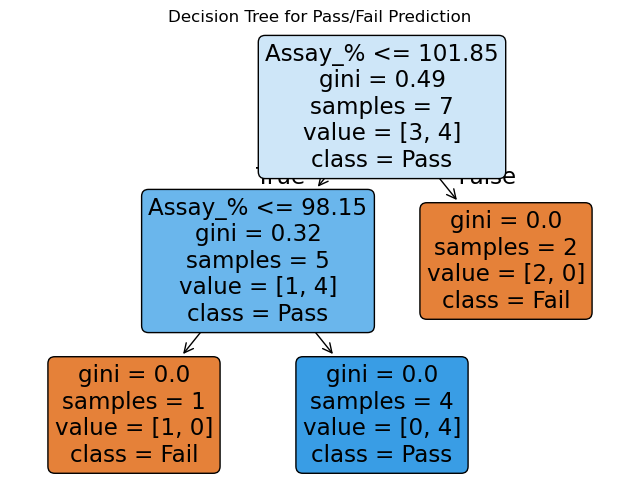

In [42]:
from sklearn import tree
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
tree.plot_tree(
    model,
    feature_names=list(X.columns),
    class_names=["Fail", "Pass"],
    filled=True,
    rounded=True
)
plt.title("Decision Tree for Pass/Fail Prediction")
plt.show()


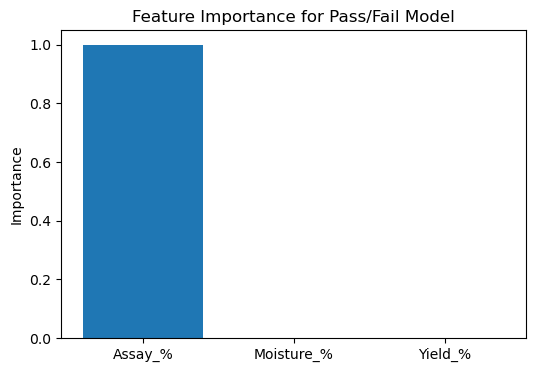

(array([1., 0., 0.]),
 array(['Assay_%', 'Moisture_%', 'Yield_%'], dtype='<U10'))

In [43]:
import numpy as np

importance_values = model.feature_importances_
features = np.array(["Assay_%", "Moisture_%", "Yield_%"])

plt.figure(figsize=(6, 4))
plt.bar(features, importance_values)
plt.ylabel("Importance")
plt.title("Feature Importance for Pass/Fail Model")
plt.show()

importance_values, features


In [44]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(
    model, X, y,
    cv=3,              # 3-fold cross validation (small dataset)
    scoring="accuracy"
)

print("Cross-validation scores:", cv_scores)
print("Mean accuracy:", cv_scores.mean())


Cross-validation scores: [1. 1. 1.]
Mean accuracy: 1.0


In [45]:
import pandas as pd

extra_data = pd.DataFrame({
    "Batch_ID": [101, 102, 103, 104],
    "Assay_%":  [100.0, 99.5, 100.2, 100.1],   # within normal potency
    "Moisture_%": [2.0, 1.9, 0.9, 0.8],        # first two: high moisture
    "Yield_%":  [88, 85, 80, 78],              # low yields
    "QC_Evaluation": [
        "High Moisture, Low Yield",
        "High Moisture, Low Yield",
        "Low Yield",
        "Low Yield"
    ],
    "Risk_Level": [
        "High Risk",
        "High Risk",
        "High Risk",
        "High Risk"
    ]
})

extra_data["Outcome"] = "Fail"

extra_data


,Batch_ID,Assay_%,Moisture_%,Yield_%,QC_Evaluation,Risk_Level,Outcome
0,101,100.0,2.0,88,"High Moisture, Low Yield",High Risk,Fail
1,102,99.5,1.9,85,"High Moisture, Low Yield",High Risk,Fail
2,103,100.2,0.9,80,Low Yield,High Risk,Fail
3,104,100.1,0.8,78,Low Yield,High Risk,Fail


In [46]:
qc_expanded = pd.concat([qc_df, extra_data], ignore_index=True)
qc_expanded


,Batch_ID,Assay_%,Moisture_%,Yield_%,Pass_Fail,QC_Evaluation,Risk_Level,Outcome
0,B001,98.5,1.2,92,Pass,Within Spec,Low Risk,Pass
1,B002,101.2,0.9,95,Pass,Within Spec,Low Risk,Pass
2,B003,99.1,1.5,90,Pass,Within Spec,Low Risk,Pass
3,B004,102.5,0.8,97,Fail,Assay OOS,High Risk,Fail
4,B005,97.8,1.9,89,Pass,"Assay OOS, High Moisture, Low Yield",High Risk,Fail
5,B006,100.5,1.1,94,Pass,Within Spec,Low Risk,Pass
6,B007,96.9,2.2,88,Fail,"Assay OOS, High Moisture, Low Yield",High Risk,Fail
7,B008,103.1,0.7,98,Fail,Assay OOS,High Risk,Fail
8,B009,99.7,1.0,93,Pass,Within Spec,Low Risk,Pass
9,B010,98.9,1.3,91,Pass,Within Spec,Low Risk,Pass


In [47]:
X_exp = qc_expanded[["Assay_%", "Moisture_%", "Yield_%"]]
y_exp = qc_expanded["Outcome"]

X_train_exp, X_test_exp, y_train_exp, y_test_exp = train_test_split(
    X_exp, y_exp, test_size=0.3, random_state=1
)

model_exp = DecisionTreeClassifier(random_state=1)
model_exp.fit(X_train_exp, y_train_exp)

from sklearn.metrics import classification_report

y_pred_exp = model_exp.predict(X_test_exp)
print(classification_report(y_test_exp, y_pred_exp))


              precision    recall  f1-score   support

        Fail       0.67      0.50      0.57         4
        Pass       0.00      0.00      0.00         1

    accuracy                           0.40         5
   macro avg       0.33      0.25      0.29         5
weighted avg       0.53      0.40      0.46         5



In [48]:
importance_exp = pd.DataFrame({
    "Feature": ["Assay_%", "Moisture_%", "Yield_%"],
    "Importance": model_exp.feature_importances_
})

importance_exp.sort_values(by="Importance", ascending=False)


,Feature,Importance
2,Yield_%,1.0
0,Assay_%,0.0
1,Moisture_%,0.0


## Week 4 – Predictive QC Intelligence

In this section, I built a simple decision tree model to predict Pass vs Fail outcomes using Assay %, Moisture %, and Yield %. I prepared a labeled dataset, trained the model, evaluated accuracy, and then examined feature importance and decision rules to keep the model explainable.

After expanding the dataset with additional High Risk batches driven by high moisture and low yield (but normal assay), the model began to rely more on Moisture and Yield for prediction. This demonstrates how data patterns influence model behavior and how explainable AI can reflect real GMP logic.

This work connects QC analytics with early-stage AI modeling for pharmaceutical manufacturing.
